In [1]:
import pandas as pd
import json
import numpy as np
import sys
sys.path.append("..")
from scoring import bootstrap_roc_auc
import matplotlib.pyplot as plt
from utils import *
from aiida_utils.load_data import load_data_slim

/usr/local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_data(path):
    data = np.loadtxt(path)
    return data

In [3]:
top_50 = get_data(path = "is_top_50.txt")

In [4]:
df = pd.read_csv('/workspaces/material-project/exported.predictions.Kahle2020.csv')
groups = load_csv(f"/workspaces/material-project/groups_and_oxi_states_5_frames/df_features_step_0.pkl")
df = df.merge(groups, left_on=['src_id'], right_on=['stru_id'])
df = df.drop(['group', 'starting_structure', 'src_database', 'src_id', 'diffusion_mean_cm2_s'], axis = 1)
X, y = df.drop(['stru_label', 'stru_id', 'is_good', 'fv_1p0_WARNlowPES', 'fv_2p0_WARNlowPES', 'fv_3p0_WARNlowPES', 'fv_4p0_WARNlowPES'], axis = 1), df['is_good'].astype(int).to_numpy()
feature_importance = np.zeros(X.shape[1])

In [5]:
feature_names = X.columns.to_numpy()

In [6]:
feature_names = feature_names[top_50 != 0]

In [7]:
top_50 = top_50[top_50 != 0]

In [8]:
feature_names = feature_names.tolist()

In [9]:
feature_names = [item.replace('vo_features_mode-structure.npy', 'valence_orbital') for item in feature_names]
feature_names = [item.replace('density_features_mode-structure_CAMN.npy', 'density_features') for item in feature_names]
feature_names = [item.replace('md_features_mode-structure_CAMN.npy', 'meredig') for item in feature_names]
feature_names = [item.replace('xrd_features_pattern_length-451_mode-structure_CAMN.npy', 'XRDPowderPattern') for item in feature_names]
feature_names = [item.replace('ee_features_mode-structure_CAMN.npy', 'EwaldEnergy') for item in feature_names]
feature_names = [item.replace('os_features_mode-structure_CAMN.npy', 'OxidationStates') for item in feature_names]
feature_names = [item.replace('bc_features_mode-structure_CAMN.npy', 'BandCenter') for item in feature_names]
feature_names = [item.replace('scm_features_mode-structure.npy', 'SineCoulombMatrix') for item in feature_names]
feature_names = [item.replace('ape_features_mode-structure_CAMN.npy', 'AtomicPackingEfficiency') for item in feature_names]

In [17]:
top_50[np.argsort(top_50)]

array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   2.,   2.,   2.,   2.,   2.,   3.,   3.,   4.,   4.,
         4.,   4.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   6.,   6.,
         6.,   6.,   6.,   7.,   7.,   7.,   7.,   8.,   8.,   9.,   9.,
         9.,  10.,  11.,  12.,  13.,  13.,  13.,  14.,  15.,  16.,  16.,
        19.,  19.,  20.,  20.,  20.,  21.,  21.,  28.,  28.,  31.,  32.,
        33.,  35.,  36.,  39.,  39.,  39.,  41.,  42.,  44.,  45.,  46.,
        47.,  49.,  51.,  51.,  54.,  54.,  55.,  56.,  56.,  57.,  60.,
        62.,  65.,  67.,  67.,  69.,  73.,  78.,  78.,  81.,  85.,  86.,
        89.,  90.,  90.,  91., 101., 103., 103., 105., 105., 108., 110.,
       111., 111., 112., 113., 113., 113., 114., 115., 115., 115., 116.,
       116., 116., 116., 116., 116., 116., 116., 116., 116.])

In [20]:
np.array(feature_names)[np.argsort(top_50)]

array(['445_valence_orbital', '298_SineCoulombMatrix',
       '323_SineCoulombMatrix', '450_valence_orbital',
       '710_XRDPowderPattern', '340_SineCoulombMatrix',
       '711_XRDPowderPattern', '314_SineCoulombMatrix',
       '497_XRDPowderPattern', '293_SineCoulombMatrix',
       '800_XRDPowderPattern', '540_XRDPowderPattern',
       '337_SineCoulombMatrix', '727_XRDPowderPattern',
       '570_XRDPowderPattern', '612_XRDPowderPattern',
       '703_XRDPowderPattern', '628_XRDPowderPattern',
       '678_XRDPowderPattern', '544_XRDPowderPattern',
       '867_XRDPowderPattern', '702_XRDPowderPattern',
       '285_SineCoulombMatrix', '629_XRDPowderPattern',
       '617_XRDPowderPattern', '618_XRDPowderPattern',
       '650_XRDPowderPattern', '651_XRDPowderPattern',
       '737_XRDPowderPattern', '799_XRDPowderPattern',
       '299_SineCoulombMatrix', '647_XRDPowderPattern',
       '605_XRDPowderPattern', '704_XRDPowderPattern',
       '752_XRDPowderPattern', '644_XRDPowderPattern',
    

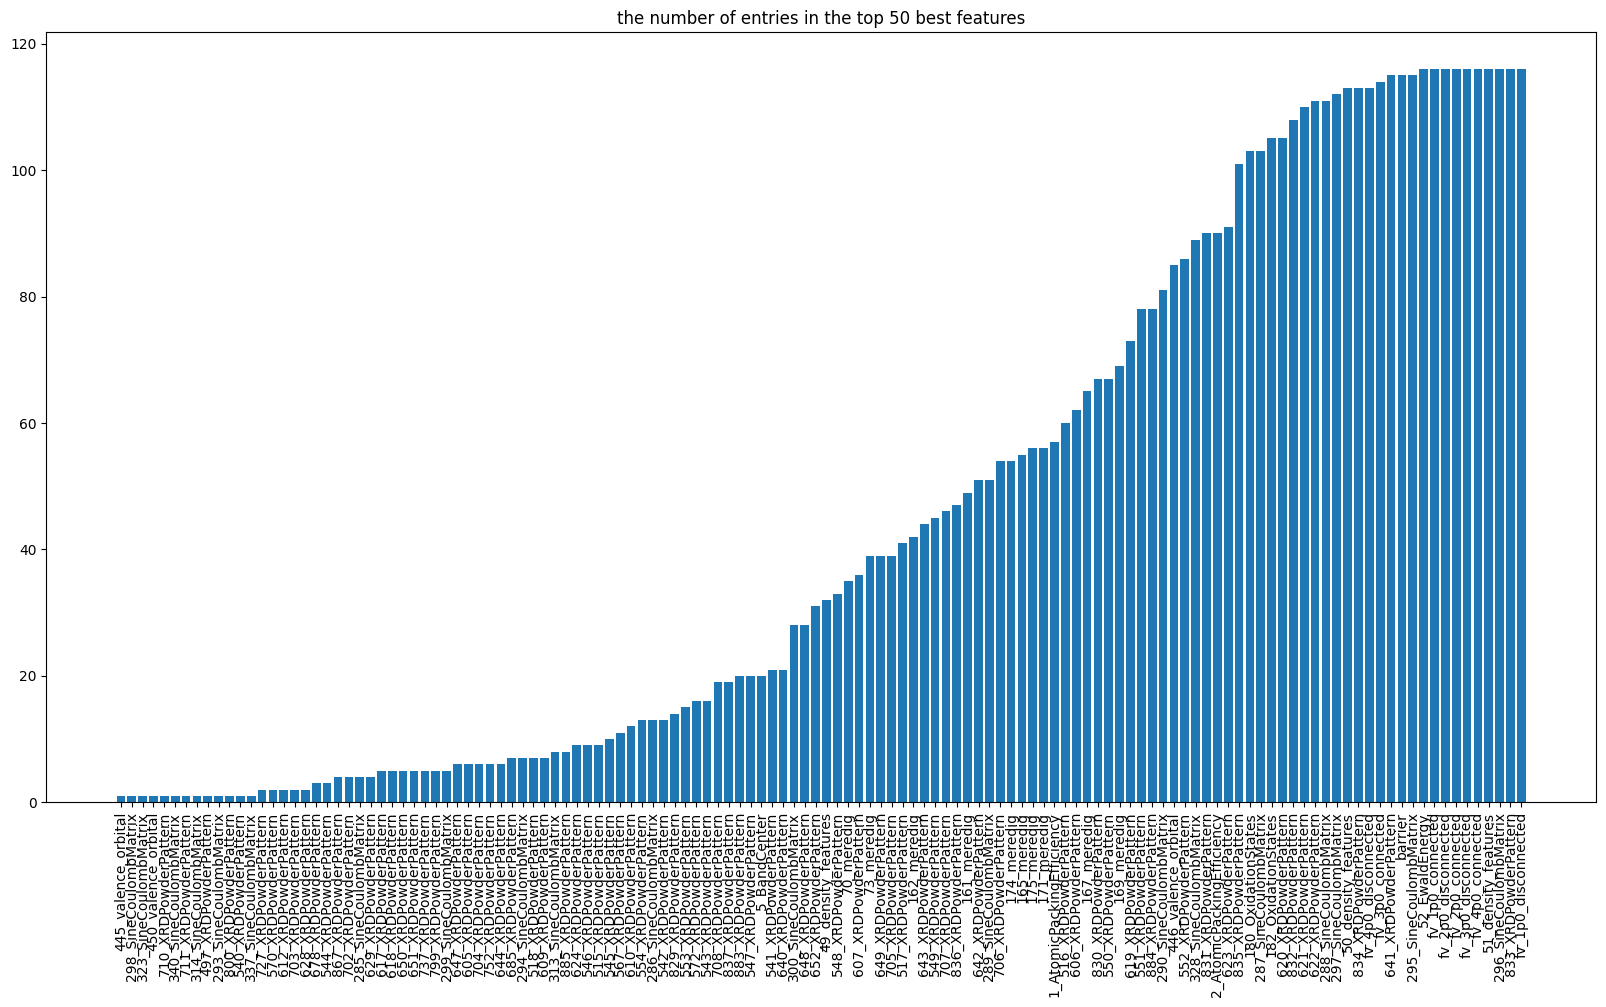

In [24]:
plt_1 = plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.title('the number of entries in the top 50 best features')
plt.bar(np.array(feature_names)[np.argsort(top_50)], top_50[np.argsort(top_50)])
plt.show()

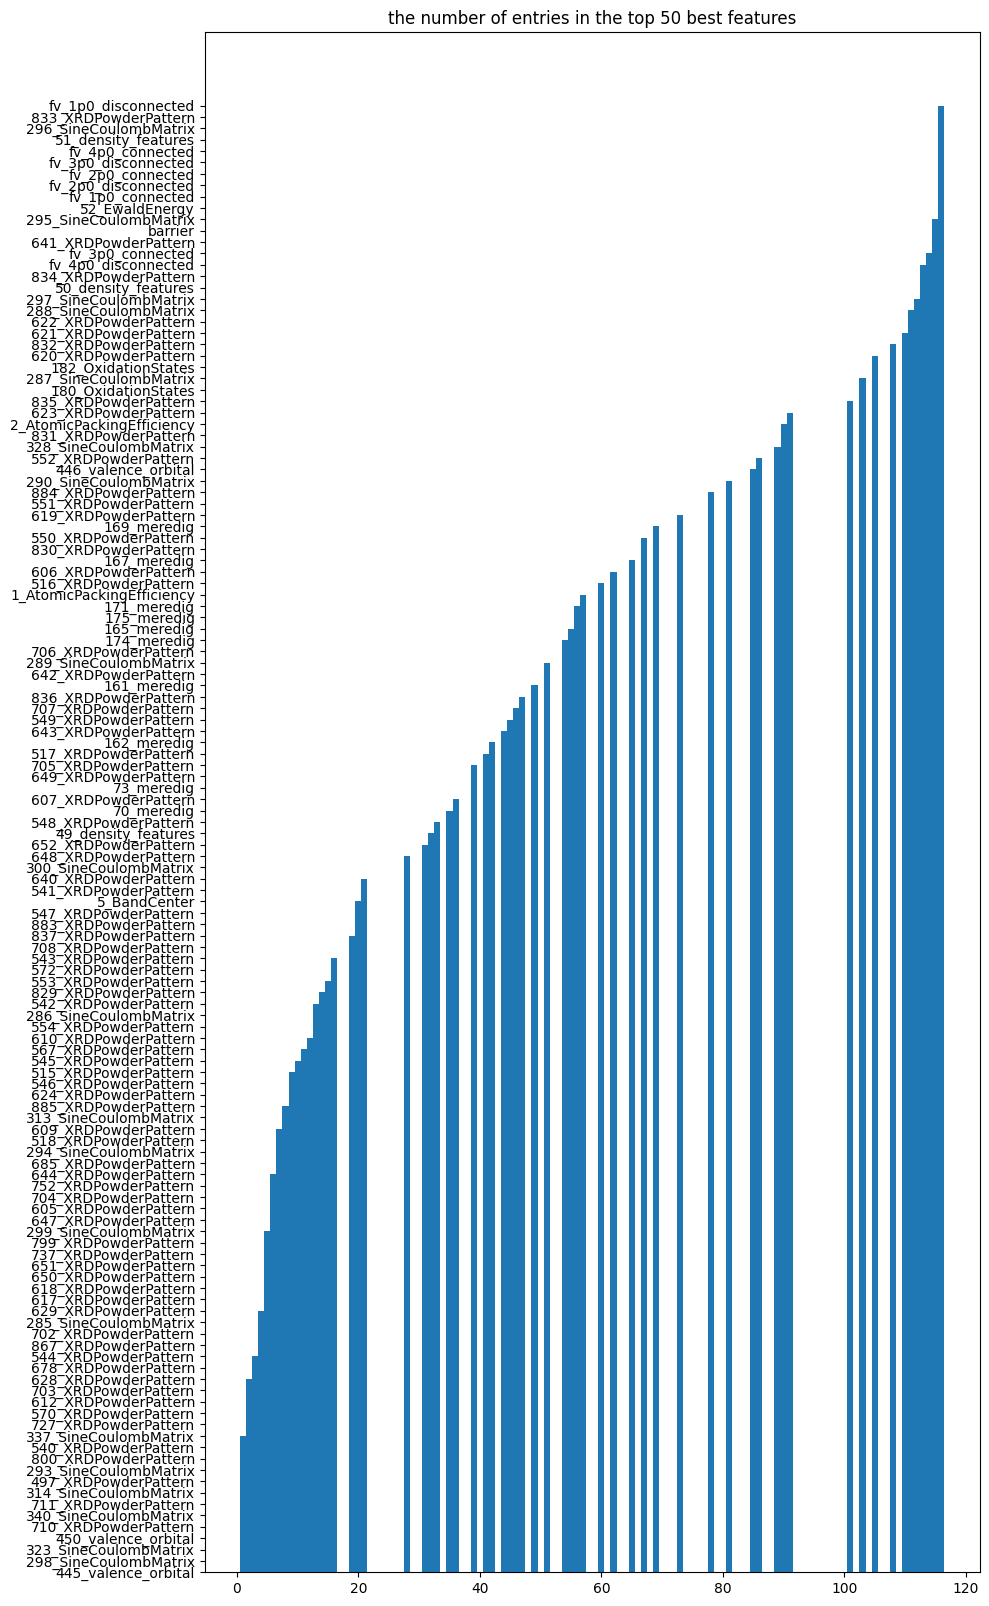

In [22]:
plt_1 = plt.figure(figsize=(10, 20))
# plt.xticks(rotation=90)
plt.title('the number of entries in the top 50 best features')
plt.bar(top_50[np.argsort(top_50)], np.array(feature_names)[np.argsort(top_50)], width=1)
plt.show()

In [11]:
df = pd.read_csv('/workspaces/material-project/exported.predictions.Kahle2020.csv')
groups = load_csv(f"/workspaces/material-project/groups_and_oxi_states_5_frames/df_features_step_0.pkl")
df = df.merge(groups, left_on=['src_id'], right_on=['stru_id'])
df = df.drop(['group', 'starting_structure', 'src_database', 'src_id', 'diffusion_mean_cm2_s'], axis = 1)